# CS360 Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time


# Load the data

In [2]:
 
import pandas as pd
 

df = pd.read_csv('final.csv')


C:\Users\moson\AppData\Local\Temp\ipykernel_25680\3265285519.py:4: DtypeWarning: Columns (2,4,9,12,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final.csv')


In [3]:
df.head()

,Unnamed: 0,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,...,0.0495,0.0,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish,0
1,1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,https://i.scdn.co/image/ab6761610000e5eb75e151...,0,...,0.724,0.0,0.134,0.262,81.956,183547.0,Argentina,South America,Spanish,0
2,2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,...,0.241,0.0,0.0929,0.216,137.915,204003.0,Argentina,South America,Spanish,0
3,3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,https://i.scdn.co/image/ab6761610000e5eb8f4ebc...,0,...,0.0924,0.000046,0.0534,0.832,96.018,153750.0,Argentina,South America,Spanish,0
4,4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1...,0,...,0.0811,0.000063,0.101,0.501,95.066,133895.0,Argentina,South America,Spanish,0


# Cleanse Data

In [4]:
df = df.drop(['Unnamed: 0','source','uri','artist_id','artist_img','album_cover','artist_individual','pivot'],axis=1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787999 entries, 0 to 1787998
Data columns (total 28 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   rank              object
 1   artist_names      object
 2   artists_num       object
 3   artist_genre      object
 4   collab            object
 5   track_name        object
 6   release_date      object
 7   album_num_tracks  object
 8   peak_rank         object
 9   previous_rank     object
 10  weeks_on_chart    object
 11  streams           object
 12  week              object
 13  danceability      object
 14  energy            object
 15  key               object
 16  mode              object
 17  loudness          object
 18  speechiness       object
 19  acousticness      object
 20  instrumentalness  object
 21  liveness          object
 22  valence           object
 23  tempo             object
 24  duration          object
 25  country           object
 26  region            object
 27  language    

In [6]:
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df['artists_num'] = pd.to_numeric(df['artists_num'], errors='coerce')
df['collab'] = pd.to_numeric(df['collab'], errors='coerce')
df['album_num_tracks'] = pd.to_numeric(df['album_num_tracks'], errors='coerce')
df['previous_rank'] = pd.to_numeric(df['previous_rank'], errors='coerce')
df['peak_rank'] = pd.to_numeric(df['peak_rank'], errors='coerce')
df['weeks_on_chart'] = pd.to_numeric(df['weeks_on_chart'], errors='coerce')
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['danceability'] = pd.to_numeric(df['danceability'], errors='coerce')
df['energy'] = pd.to_numeric(df['energy'], errors='coerce')
df['key'] = pd.to_numeric(df['key'], errors='coerce')
df['mode'] = pd.to_numeric(df['mode'], errors='coerce')
df['loudness'] = pd.to_numeric(df['loudness'], errors='coerce')
df['speechiness'] = pd.to_numeric(df['speechiness'], errors='coerce')
df['instrumentalness'] = pd.to_numeric(df['instrumentalness'], errors='coerce')
df['valence'] = pd.to_numeric(df['liveness'], errors='coerce')
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['liveness'] = pd.to_numeric(df['liveness'], errors='coerce')

df['peak_rank']

0            1.0
1            2.0
2            3.0
3            5.0
4            6.0
           ...  
1787994    197.0
1787995    197.0
1787996    114.0
1787997    114.0
1787998    114.0
Name: peak_rank, Length: 1787999, dtype: float64

# Look at Data and Visualize

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787999 entries, 0 to 1787998
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   rank              float64
 1   artist_names      object 
 2   artists_num       float64
 3   artist_genre      object 
 4   collab            float64
 5   track_name        object 
 6   release_date      object 
 7   album_num_tracks  float64
 8   peak_rank         float64
 9   previous_rank     float64
 10  weeks_on_chart    float64
 11  streams           float64
 12  week              object 
 13  danceability      float64
 14  energy            float64
 15  key               float64
 16  mode              float64
 17  loudness          float64
 18  speechiness       float64
 19  acousticness      object 
 20  instrumentalness  float64
 21  liveness          float64
 22  valence           float64
 23  tempo             float64
 24  duration          float64
 25  country           object 
 26  region        

In [8]:
df.shape

(1787999, 28)

In [9]:
df['tempo']

0          173.935
1           81.956
2          137.915
3           96.018
4           95.066
            ...   
1787994    110.015
1787995    110.015
1787996    116.032
1787997    116.032
1787998    116.032
Name: tempo, Length: 1787999, dtype: float64

array([[<AxesSubplot:title={'center':'rank'}>]], dtype=object)

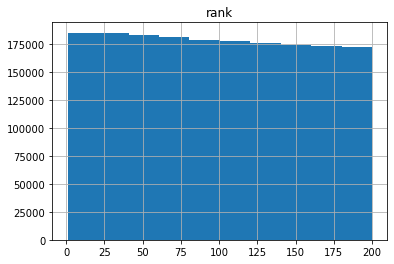

In [10]:
df.hist(column='rank')

In [11]:
df.describe()

,rank,artists_num,collab,album_num_tracks,peak_rank,previous_rank,weeks_on_chart,streams,danceability,energy,key,mode,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration
count,1.787926e+06,1.787926e+06,1.787926e+06,1.787926e+06,1.787926e+06,1.787926e+06,1.787926e+06,1.787926e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06
mean,9.906873e+01,2.244799e+00,6.277273e-01,8.464146e+00,4.007492e+01,8.350829e+01,3.528783e+01,6.974693e+05,6.982144e-01,6.561285e-01,5.273468e+00,5.514606e-01,-6.175125e+00,1.144555e-01,9.427061e-03,1.693789e-01,1.693789e-01,1.219921e+02,2.115372e+05
std,5.773889e+01,1.610825e+00,4.834107e-01,8.549858e+00,4.561516e+01,5.905889e+01,4.266578e+01,2.381627e+06,1.319124e-01,1.562644e-01,3.616229e+00,4.973449e-01,2.386746e+00,9.996784e-02,6.740489e-02,1.264947e-01,1.264947e-01,3.016564e+01,5.805541e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,2.067000e+03,8.590000e-02,3.160000e-03,0.000000e+00,0.000000e+00,-4.141000e+01,2.230000e-02,0.000000e+00,1.340000e-02,1.340000e-02,3.126200e+01,3.013300e+04
25%,4.900000e+01,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,3.100000e+01,7.000000e+00,2.485900e+04,6.130000e-01,5.570000e-01,2.000000e+00,0.000000e+00,-7.508000e+00,4.400000e-02,0.000000e+00,9.220000e-02,9.220000e-02,9.669900e+01,1.739480e+05
50%,9.800000e+01,2.000000e+00,1.000000e+00,7.000000e+00,2.100000e+01,8.000000e+01,2.000000e+01,6.473200e+04,7.210000e-01,6.730000e-01,5.000000e+00,1.000000e+00,-5.837000e+00,7.210000e-02,0.000000e+00,1.180000e-01,1.180000e-01,1.199320e+02,2.027350e+05
75%,1.490000e+02,3.000000e+00,1.000000e+00,1.400000e+01,6.100000e+01,1.330000e+02,4.600000e+01,3.142690e+05,7.970000e-01,7.750000e-01,8.000000e+00,1.000000e+00,-4.516000e+00,1.490000e-01,3.360000e-05,2.090000e-01,2.090000e-01,1.410260e+02,2.340000e+05
max,2.000000e+02,2.000000e+01,1.000000e+00,1.990000e+02,2.000000e+02,2.000000e+02,2.900000e+02,8.495293e+07,9.860000e-01,1.000000e+00,1.100000e+01,1.000000e+00,1.906000e+00,9.660000e-01,9.900000e-01,9.900000e-01,9.900000e-01,2.320180e+02,1.787030e+06


array([[<AxesSubplot:title={'center':'danceability'}>]], dtype=object)

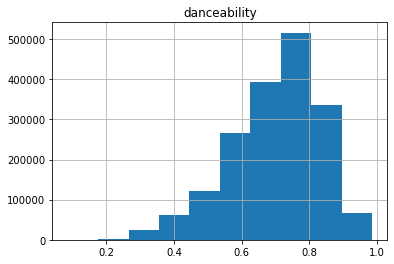

In [12]:
df.hist(column='danceability')

array([[<AxesSubplot:title={'center':'liveness'}>]], dtype=object)

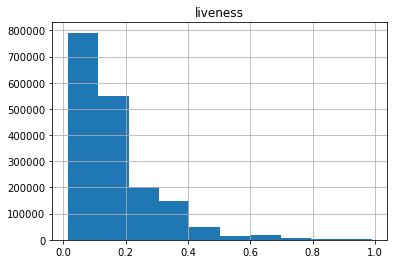

In [13]:
df.hist('liveness')

In [14]:
df.dropna(inplace=True) # drop null values 
pd.isnull(df).sum()  

rank                0
artist_names        0
artists_num         0
artist_genre        0
collab              0
track_name          0
release_date        0
album_num_tracks    0
peak_rank           0
previous_rank       0
weeks_on_chart      0
streams             0
week                0
danceability        0
energy              0
key                 0
mode                0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
country             0
region              0
language            0
dtype: int64

In [15]:
df2 = df[["streams","track_name","rank","release_date","artist_names","artist_genre","country","region","language"]].copy()
df2 = df2.drop_duplicates(subset=['streams'],keep='last')
#df2 = df2.drop_duplicates(subset=['release_date'],keep='last')
df2.sort_values(by='streams', ascending=False).head(10)


,streams,track_name,rank,release_date,artist_names,artist_genre,country,region,language
586753,84952932.0,Easy On Me,1.0,2021-10-14,Adele,pop,Global,Global,Global
590473,84131760.0,good 4 u,1.0,2021-05-21,Olivia Rodrigo,pop,Global,Global,Global
599306,80764045.0,drivers license,1.0,2021-01-08,Olivia Rodrigo,pop,Global,Global,Global
577987,78460903.0,As It Was,1.0,2022-03-31,Harry Styles,pop,Global,Global,Global
600804,77001868.0,good 4 u,1.0,2021-05-21,Olivia Rodrigo,pop,Global,Global,Global
582524,75028417.0,As It Was,1.0,2022-05-20,Harry Styles,pop,Global,Global,Global
601360,71467874.0,7 rings,1.0,2019-01-18,Ariana Grande,pop,Global,Global,Global
611828,70502410.0,STAY (with Justin Bieber),1.0,2021-07-23,"The Kid LAROI, Justin Bieber",pop,Global,Global,Global
608050,69314436.0,STAY (with Justin Bieber),1.0,2021-07-23,"The Kid LAROI, Justin Bieber",canadian pop,Global,Global,Global
604843,68911998.0,good 4 u,1.0,2021-05-21,Olivia Rodrigo,pop,Global,Global,Global


Text(0.5, 1.0, 'Top genres')

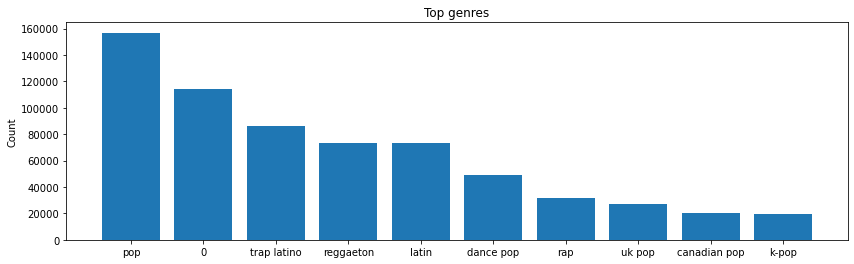

In [16]:
# df_filtered = df[df['artist_genre'] != '0']

# 0 means null genre (no genre entered)
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(df['artist_genre'].value_counts().index[:10], df['artist_genre'].value_counts().values[:10])
ax.set_ylabel("Count")
ax.set_title("Top genres")

Text(0.5, 1.0, 'Top genres')

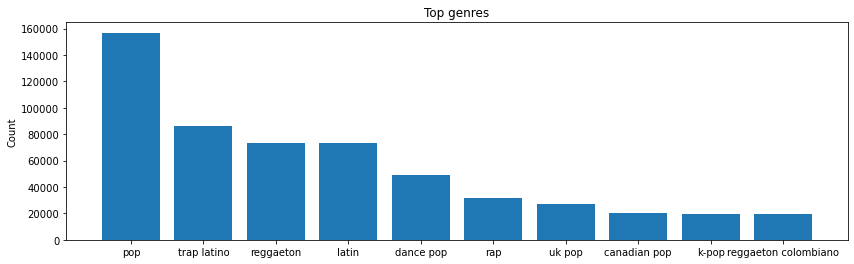

In [17]:
# Top 10 genres (excluding null value '0')
df_filtered = df[df['artist_genre'] != '0']
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(df_filtered['artist_genre'].value_counts().index[:10], df_filtered['artist_genre'].value_counts().values[:10])
ax.set_ylabel("Count")
ax.set_title("Top genres")

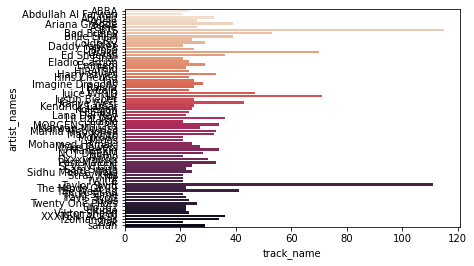

In [18]:
# source: https://medium.com/@vermapragya/spotify-music-data-analysis-part-3-9097829df16e

# fetching aritsts with more than 20 songs
df_artists = df.drop_duplicates(subset=['track_name'],keep='last') # drop duplicates of track names
num_tracks = df_artists.groupby('artist_names',as_index=False).agg({"track_name": "nunique"}) # group by artist names and have their unique tracks
max_songs = num_tracks.loc[num_tracks['track_name'] > 20] # number of tracks over twenty

# plotting barplot
sns.barplot(y = max_songs['artist_names'], x = max_songs['track_name'], palette='rocket_r')
plt.rcParams["figure.figsize"] = (20,20)

# BTS. Drake, Jul, Taylor Swift, The Weeknd, Bad Bunny, Juice Wrld are the artists with the most amount of tracks on the list 

# Train Data

In [19]:
from sklearn.model_selection import train_test_split

#dropping all columns that aren't float/int
#df = df.drop(['artist_names','artist_genre','track_name','country','region','language','release_date','week'],axis=1)
#df.fillna(df.mean())

#create dataframe with just the audio features from Spotify API
df_audio_features = df[['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration','streams']]
df_audio_features.dropna(inplace=True)
df_audio_features = df_audio_features.reset_index()

train, test = train_test_split(df_audio_features, test_size=0.2)
x_train = train.drop('streams',axis=1)
y_train = train['streams']
x_test = test.drop('streams',axis=1)
y_test = test['streams']
df_audio_features.head()

C:\Users\moson\AppData\Local\Temp\ipykernel_25680\4015304274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_features.dropna(inplace=True)


,index,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,streams
0,0,0.583,0.834,0.0,1.0,-4.875,0.0444,0.0495,0.000000,0.0658,0.0658,173.935,178203.0,3003411.0
1,1,0.654,0.354,5.0,1.0,-7.358,0.0738,0.724,0.000000,0.1340,0.1340,81.956,183547.0,2512175.0
2,2,0.721,0.463,1.0,0.0,-9.483,0.0646,0.241,0.000000,0.0929,0.0929,137.915,204003.0,2408983.0
3,3,0.870,0.548,10.0,0.0,-5.253,0.0770,0.0924,0.000046,0.0534,0.0534,96.018,153750.0,2080139.0
4,4,0.761,0.696,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.1010,0.1010,95.066,133895.0,1923270.0


In [20]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
x_train

(1430024, 13) (357507, 13) (1430024,) (357507,)


,index,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
1206256,1206560,0.828,0.695,6.0,1.0,-7.955,0.0720,0.14800000000000002,0.000008,0.1010,0.1010,129.980,133073.0
1583172,1583551,0.395,0.133,10.0,1.0,-12.712,0.0441,0.9259999999999999,0.000000,0.0906,0.0906,142.474,290023.0
812369,812577,0.715,0.858,3.0,1.0,-9.039,0.4230,0.155,0.000000,0.0884,0.0884,75.012,177937.0
60056,60148,0.822,0.801,11.0,1.0,-5.021,0.0485,0.205,0.057800,0.0719,0.0719,124.995,157440.0
1756863,1757329,0.877,0.677,5.0,0.0,-4.969,0.3560,0.0439,0.000000,0.0986,0.0986,144.941,172185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132501,132610,0.705,0.896,11.0,1.0,-2.647,0.0606,0.00851,0.000000,0.1180,0.1180,76.024,220773.0
632802,632994,0.753,0.498,2.0,1.0,-5.610,0.0504,0.551,0.000000,0.0706,0.0706,89.950,158053.0
1785476,1785944,0.688,0.563,10.0,0.0,-5.945,0.0334,0.439,0.000003,0.3450,0.3450,93.023,250773.0
1203296,1203600,0.345,0.612,7.0,0.0,-6.543,0.0608,0.23199999999999998,0.000000,0.1940,0.1940,179.773,153000.0


In [21]:
pd.isnull(df_audio_features).sum()


index               0
danceability        0
energy              0
key                 0
mode                0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
streams             0
dtype: int64

In [22]:
df_audio_features.shape

(1787531, 14)

# Predict

In [23]:
df_audio_features.describe()

,index,danceability,energy,key,mode,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration,streams
count,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06,1.787531e+06
mean,8.940067e+05,6.982144e-01,6.561285e-01,5.273468e+00,5.514606e-01,-6.175125e+00,1.144555e-01,9.427061e-03,1.693789e-01,1.693789e-01,1.219921e+02,2.115372e+05,6.975588e+05
std,5.161240e+05,1.319124e-01,1.562644e-01,3.616229e+00,4.973449e-01,2.386746e+00,9.996784e-02,6.740489e-02,1.264947e-01,1.264947e-01,3.016564e+01,5.805541e+04,2.381877e+06
min,0.000000e+00,8.590000e-02,3.160000e-03,0.000000e+00,0.000000e+00,-4.141000e+01,2.230000e-02,0.000000e+00,1.340000e-02,1.340000e-02,3.126200e+01,3.013300e+04,2.067000e+03
25%,4.470055e+05,6.130000e-01,5.570000e-01,2.000000e+00,0.000000e+00,-7.508000e+00,4.400000e-02,0.000000e+00,9.220000e-02,9.220000e-02,9.669900e+01,1.739480e+05,2.485800e+04
50%,8.939990e+05,7.210000e-01,6.730000e-01,5.000000e+00,1.000000e+00,-5.837000e+00,7.210000e-02,0.000000e+00,1.180000e-01,1.180000e-01,1.199320e+02,2.027350e+05,6.472700e+04
75%,1.341016e+06,7.970000e-01,7.750000e-01,8.000000e+00,1.000000e+00,-4.516000e+00,1.490000e-01,3.360000e-05,2.090000e-01,2.090000e-01,1.410260e+02,2.340000e+05,3.142280e+05
max,1.787998e+06,9.860000e-01,1.000000e+00,1.100000e+01,1.000000e+00,1.906000e+00,9.660000e-01,9.900000e-01,9.900000e-01,9.900000e-01,2.320180e+02,1.787030e+06,8.495293e+07


In [24]:
df_audio_features['streams'].describe()

count    1.787531e+06
mean     6.975588e+05
std      2.381877e+06
min      2.067000e+03
25%      2.485800e+04
50%      6.472700e+04
75%      3.142280e+05
max      8.495293e+07
Name: streams, dtype: float64

<AxesSubplot:ylabel='Density'>

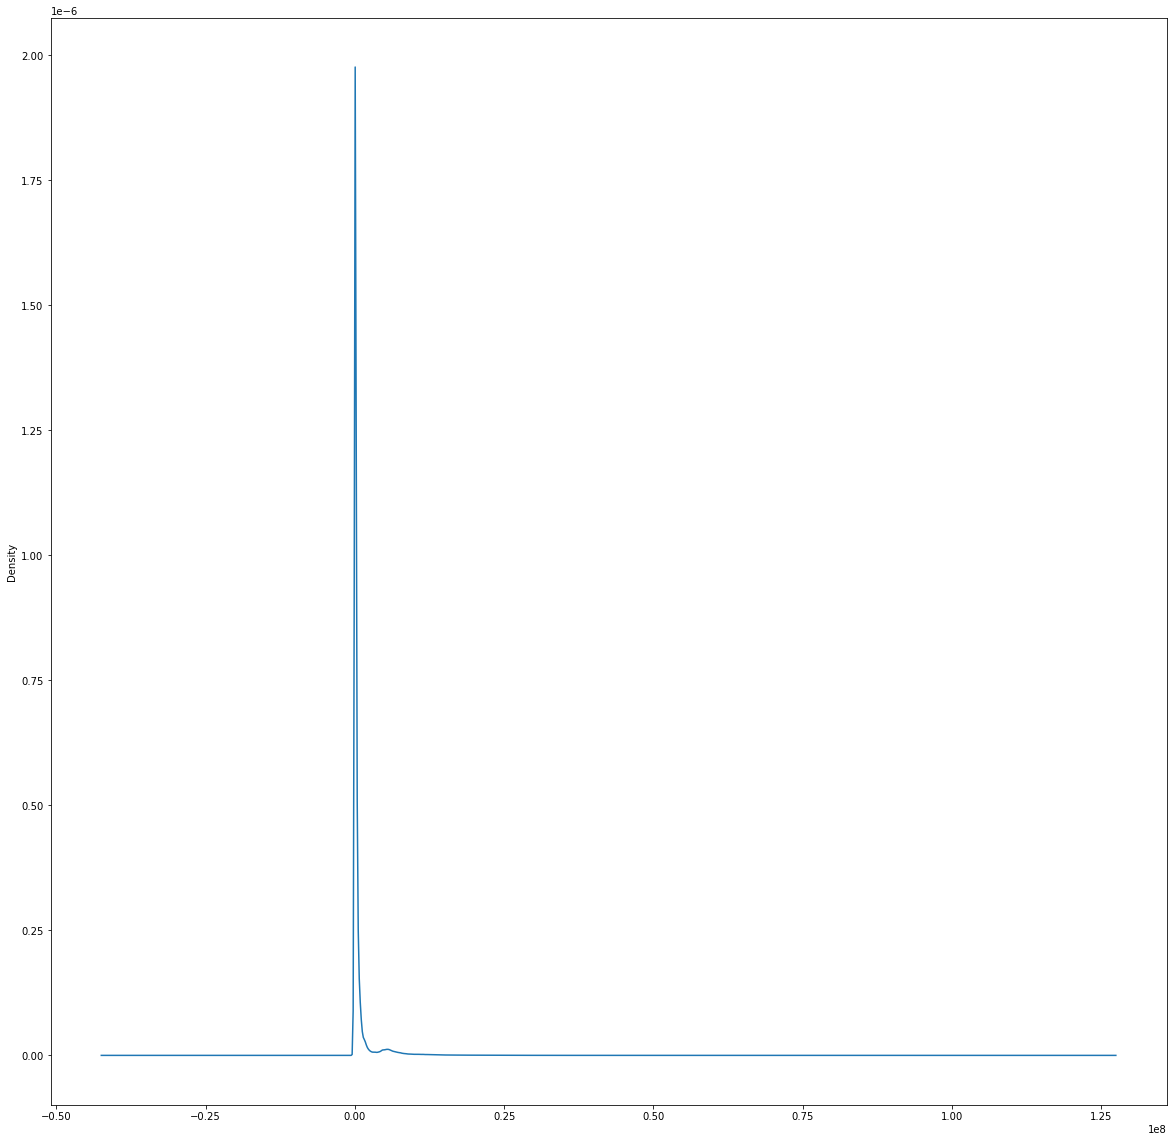

In [25]:
df_audio_features['streams'].plot(kind='kde')

In [26]:
df_audio_features['streams'].median()

64727.0

In [27]:
#make new column for classification (>100k streams, <100k, etc.)
df_audio_features.shape
df_audio_features[df_audio_features['streams'] > 325000].shape[0] / df_audio_features.shape[0] #top 10% is streams >1000000, top25% is >325000
#don't feed streams into model


#transformations he told us to do
df_audio_features['Top song'] = [0 if x < 325000 else 1 for x in df_audio_features['streams']]
df_audio_features[['streams', 'Top song']]

,streams,Top song
0,3003411.0,1
1,2512175.0,1
2,2408983.0,1
3,2080139.0,1
4,1923270.0,1
...,...,...
1787526,37591.0,0
1787527,37591.0,0
1787528,36817.0,0
1787529,36817.0,0


<AxesSubplot:>

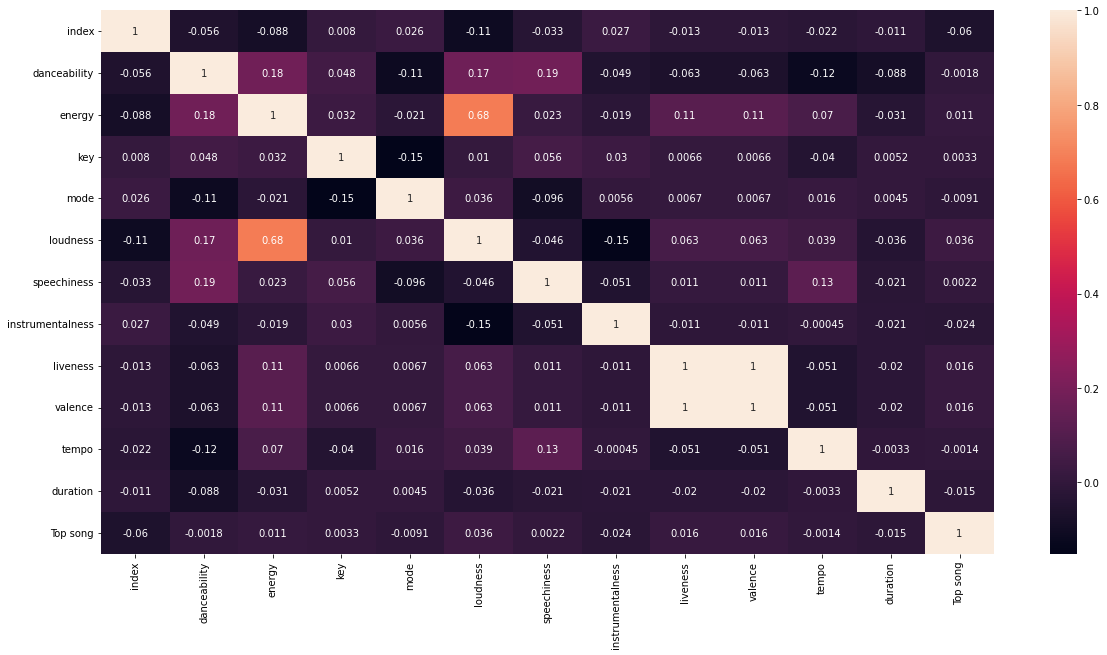

In [28]:
df_audio_features = df_audio_features.drop(['streams'],axis=1)
plt.figure(figsize=(20, 10))
sns.heatmap(df_audio_features.corr(),annot = True)

In [29]:
X = df_audio_features.drop(['Top song', 'index'],axis=1)
y = df_audio_features['Top song']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.info()

(1430024, 12) (357507, 12) (1430024,) (357507,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430024 entries, 806450 to 121958
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   danceability      1430024 non-null  float64
 1   energy            1430024 non-null  float64
 2   key               1430024 non-null  float64
 3   mode              1430024 non-null  float64
 4   loudness          1430024 non-null  float64
 5   speechiness       1430024 non-null  float64
 6   acousticness      1430024 non-null  object 
 7   instrumentalness  1430024 non-null  float64
 8   liveness          1430024 non-null  float64
 9   valence           1430024 non-null  float64
 10  tempo             1430024 non-null  float64
 11  duration          1430024 non-null  float64
dtypes: float64(11), object(1)
memory usage: 141.8+ MB


# Decision Tree Classifier

In [30]:
times = []
accuracies = []

#Find optimal depth

from sklearn.tree import DecisionTreeClassifier
#DTclf = DecisionTreeClassifier()

acc_list = []
depths = list(range(1,13))

for i in depths:
    DTclf = DecisionTreeClassifier(criterion="entropy",max_depth = i, random_state=42)
    DTclf.fit(x_train,y_train)
    cross_val_acc = np.mean(cross_val_score(DTclf,X_train,y_train,cv=5))
    acc_list.append(cross_val_acc)

best_depth_index = np.argmax(acc_list)
best_depth = depths[best_depth_index]
print(acc_list)


[0.7571005801917524, 0.757197081986491, 0.7574460289570706, 0.7579704956866435, 0.7583222379137509, 0.7587739785735692, 0.75929704678243, 0.7597879475283302, 0.7609354806378568, 0.7627088776626574, 0.764471086213686, 0.7668255919408018]


In [31]:
#Test on optimal depth

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error,mean_squared_error

start = time.time()
my_tree = DecisionTreeClassifier(criterion="entropy", max_depth = best_depth, random_state=42)
my_tree.fit(X_train,y_train)
predictions = my_tree.predict(X_test)
times.append(time.time()-start)

predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [32]:
DTscore = my_tree.score(X_test,y_test)
print(DTscore)
accuracies.append(DTscore)

0.7669304377256949


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

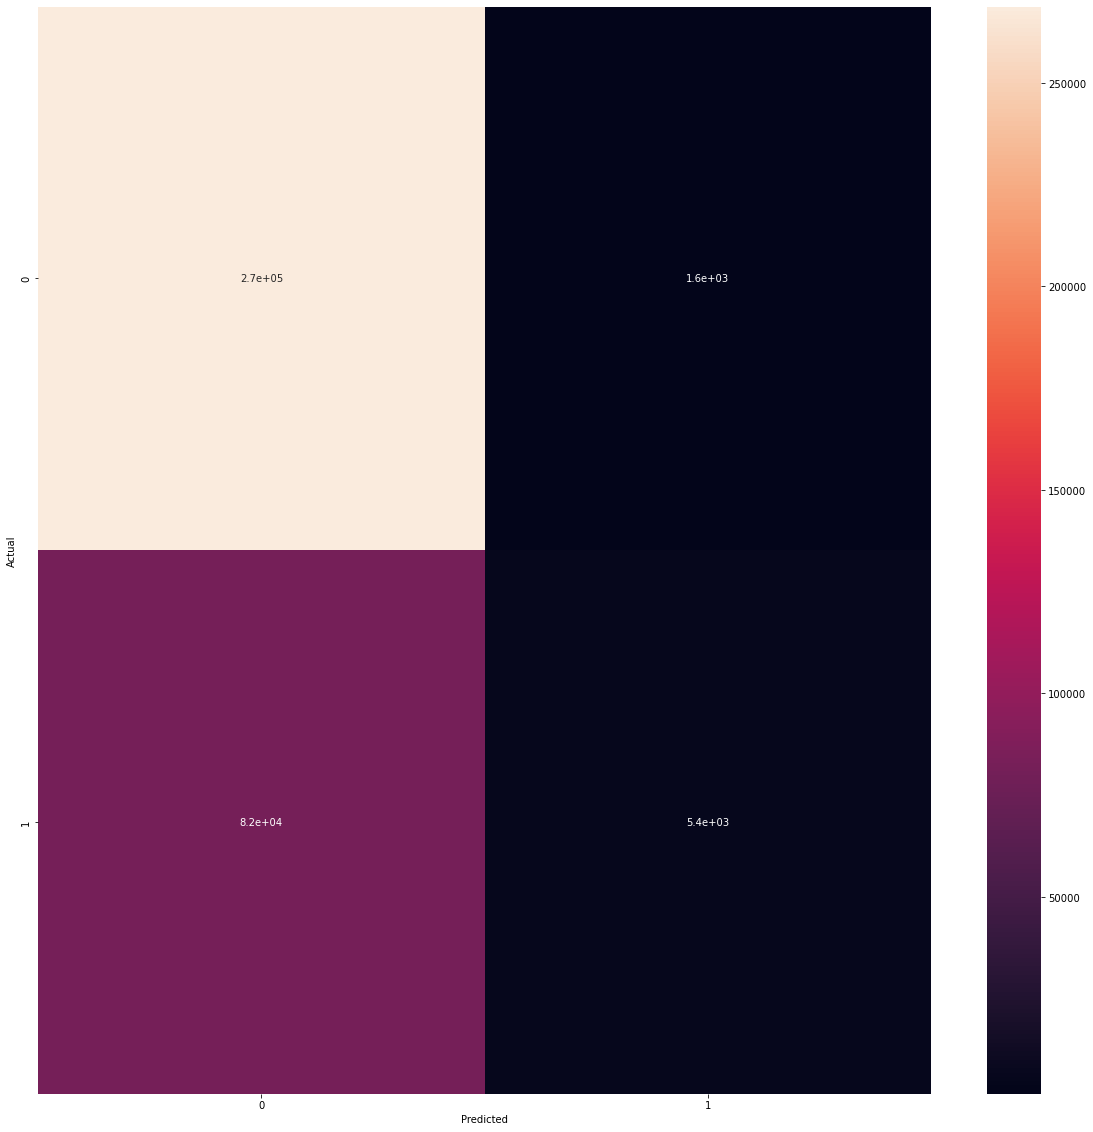

In [33]:
logdata = {'y_Predicted': predictions,
        'y_Actual':    y_test
        }

df_conf = pd.DataFrame(logdata, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

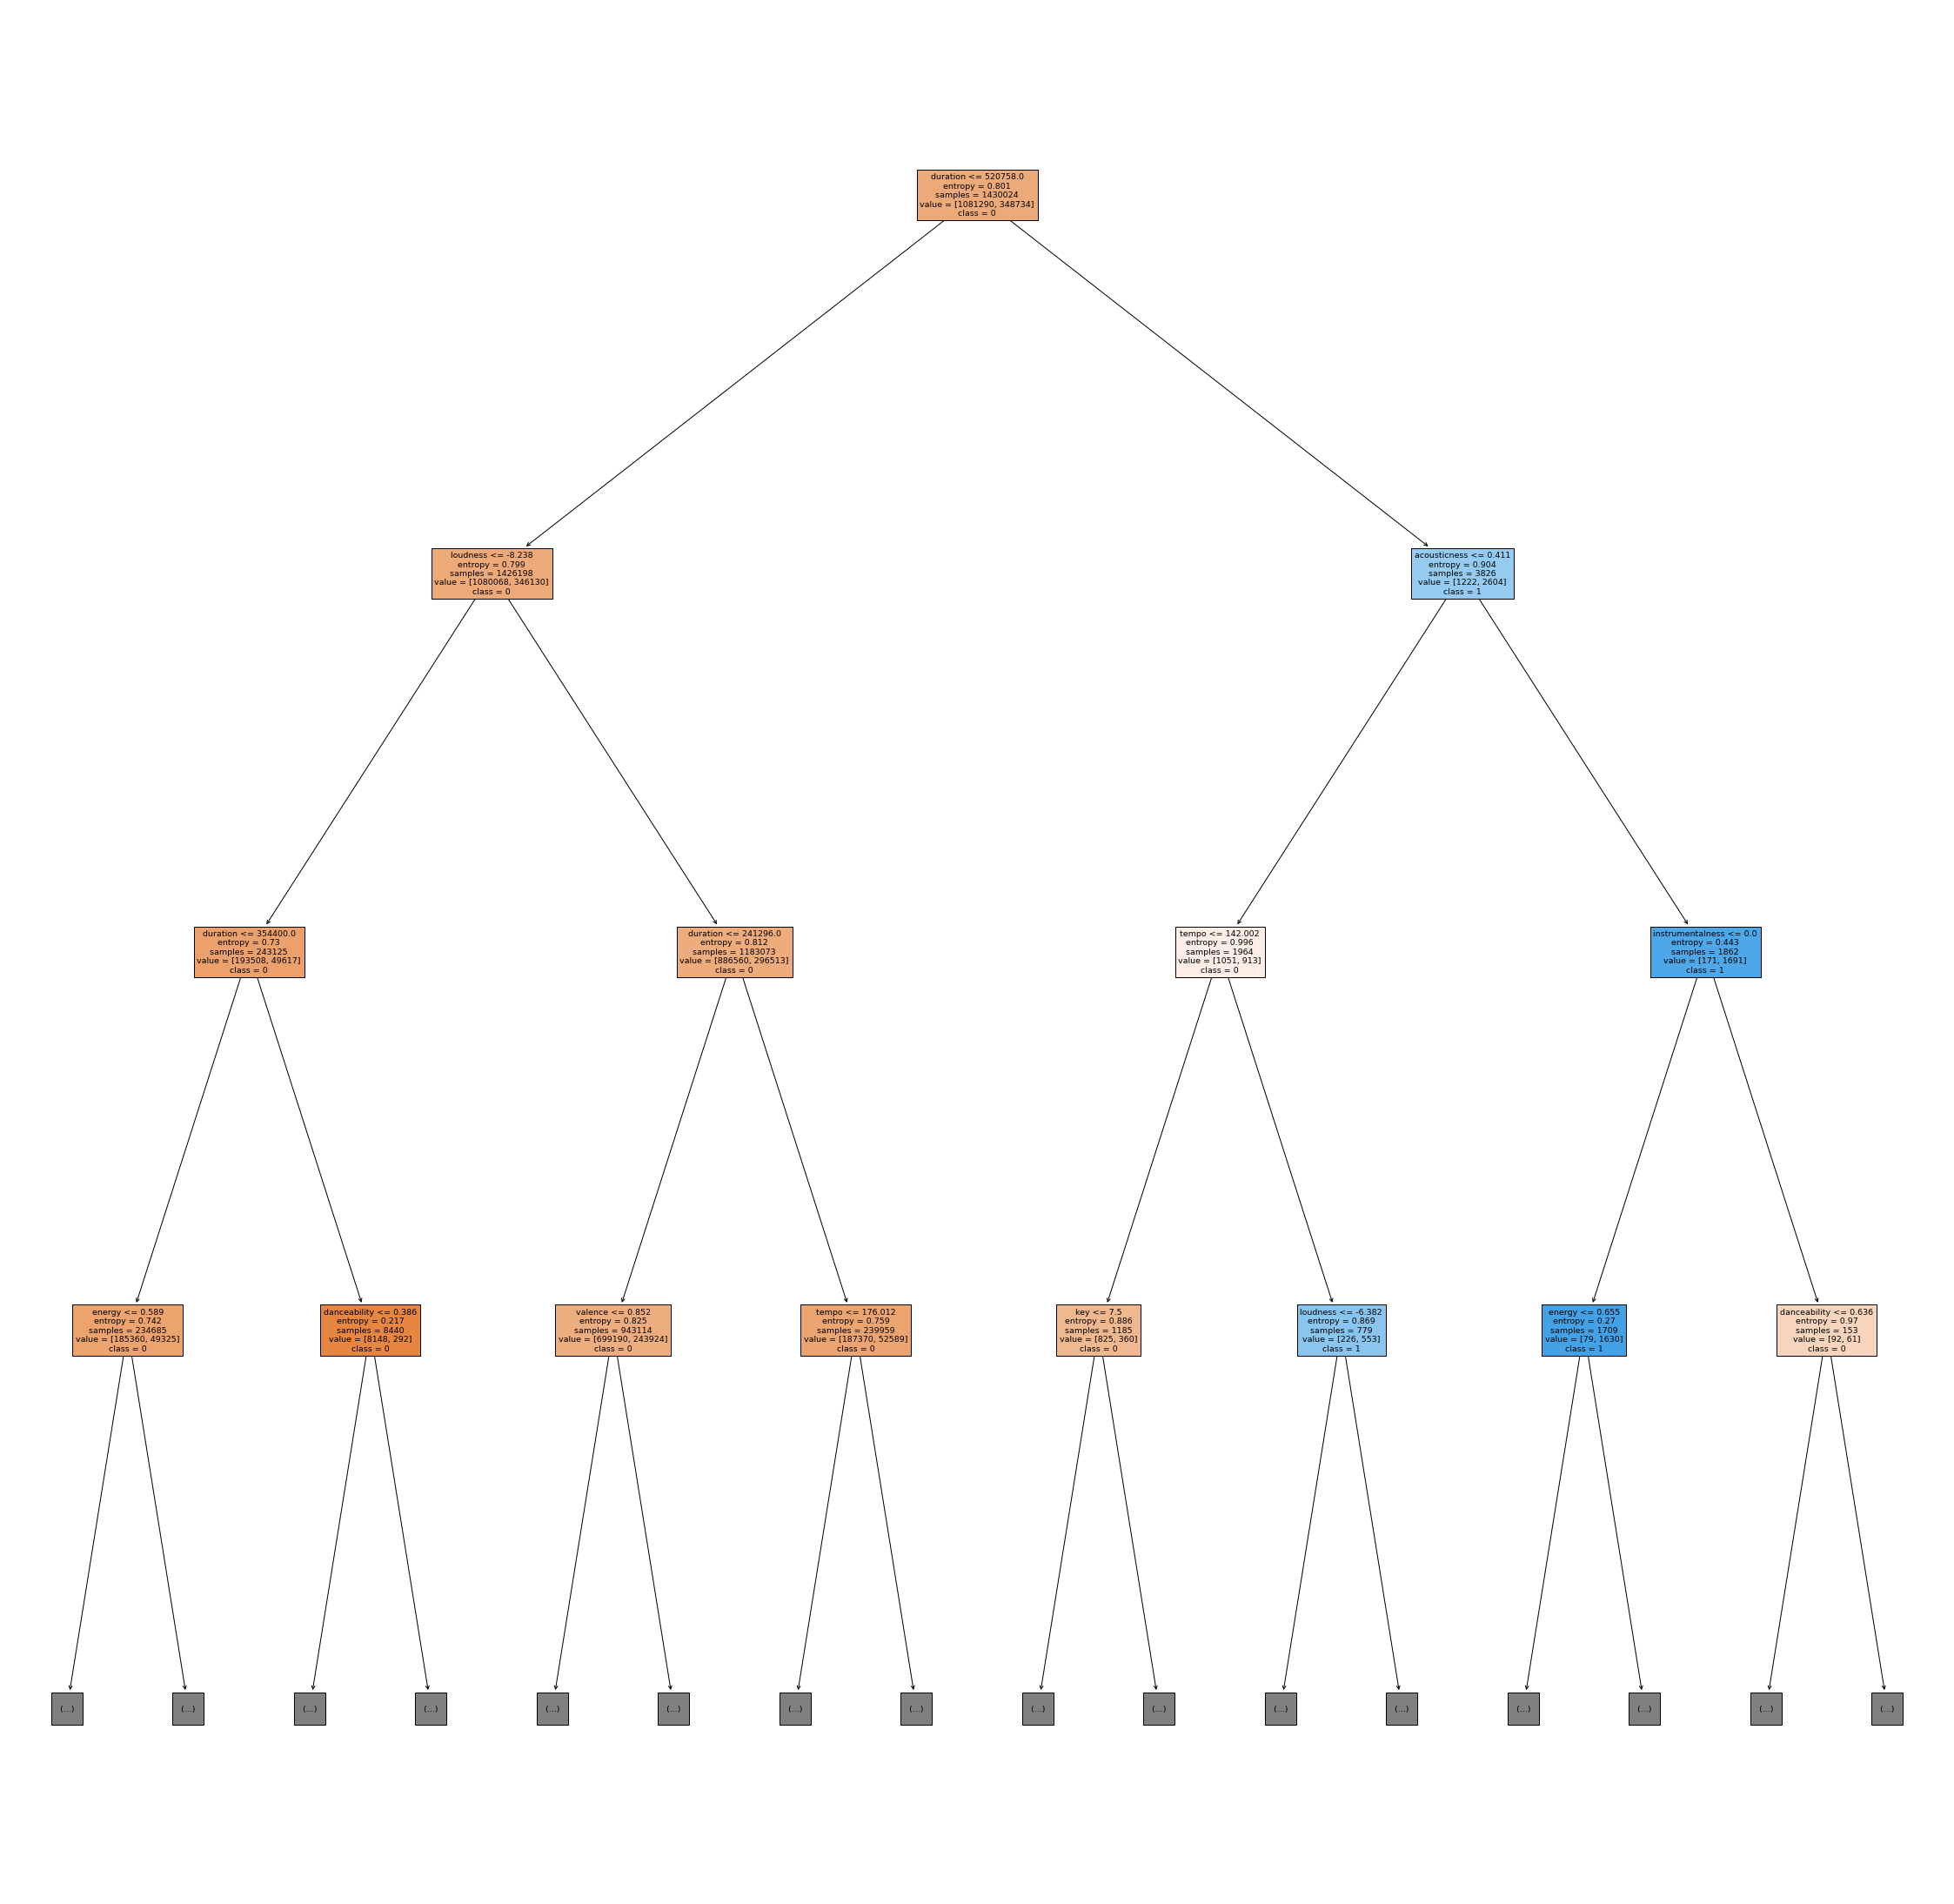

In [34]:
#visualize decision tree
from sklearn import tree

_, ax = plt.subplots(figsize=(40,40)) # Resize figure

class_names = ["0","1"]

tree.plot_tree(my_tree,
                feature_names = X_train.columns, 
                class_names = class_names,
              filled = True, max_depth=3, ax=ax)

plt.show()

In [35]:
#only run if you want to save decision tree
#tree.export_graphviz(my_tree, out_file=open("tree.dot","w"), feature_names=X_train.columns, class_names = class_names, max_depth=3 ,filled = True)

In [36]:
'''from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred = np.array(y_pred).reshape(-1,1)

print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(lr.score(y_test,y_pred))'''

'from sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import r2_score\nfrom sklearn.metrics import mean_absolute_error,mean_squared_error\n\nlr = LinearRegression()\nlr.fit(X_train, y_train)\ny_pred = lr.predict(X_test)\ny_pred = np.array(y_pred).reshape(-1,1)\n\nprint(mean_squared_error(y_test, y_pred))\nprint(np.sqrt(mean_squared_error(y_test, y_pred)))\nprint(lr.score(y_test,y_pred))'

# KNN

In [37]:
#Find optimal number of neighbors
from sklearn.neighbors import KNeighborsClassifier

acc_list = []
nn = list(range(1,10))
for i in nn:    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    cross_val_acc = np.mean(cross_val_score(knn,X_train,y_train,cv=5))
    acc_list.append(cross_val_acc)

    #print(predictions==y_test)
    #print(acc)

best_nn_index = np.argmax(acc_list)
best_nn = nn[best_nn_index]
print(best_nn)

6


In [38]:
#test with best number of neighbors
start = time.time()
knn = KNeighborsClassifier(n_neighbors=best_nn)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
times.append(time.time()-start)

In [39]:
KNNscore = knn.score(X_test,y_test)
print(KNNscore)
accuracies.append(KNNscore)

0.8218608306970213


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

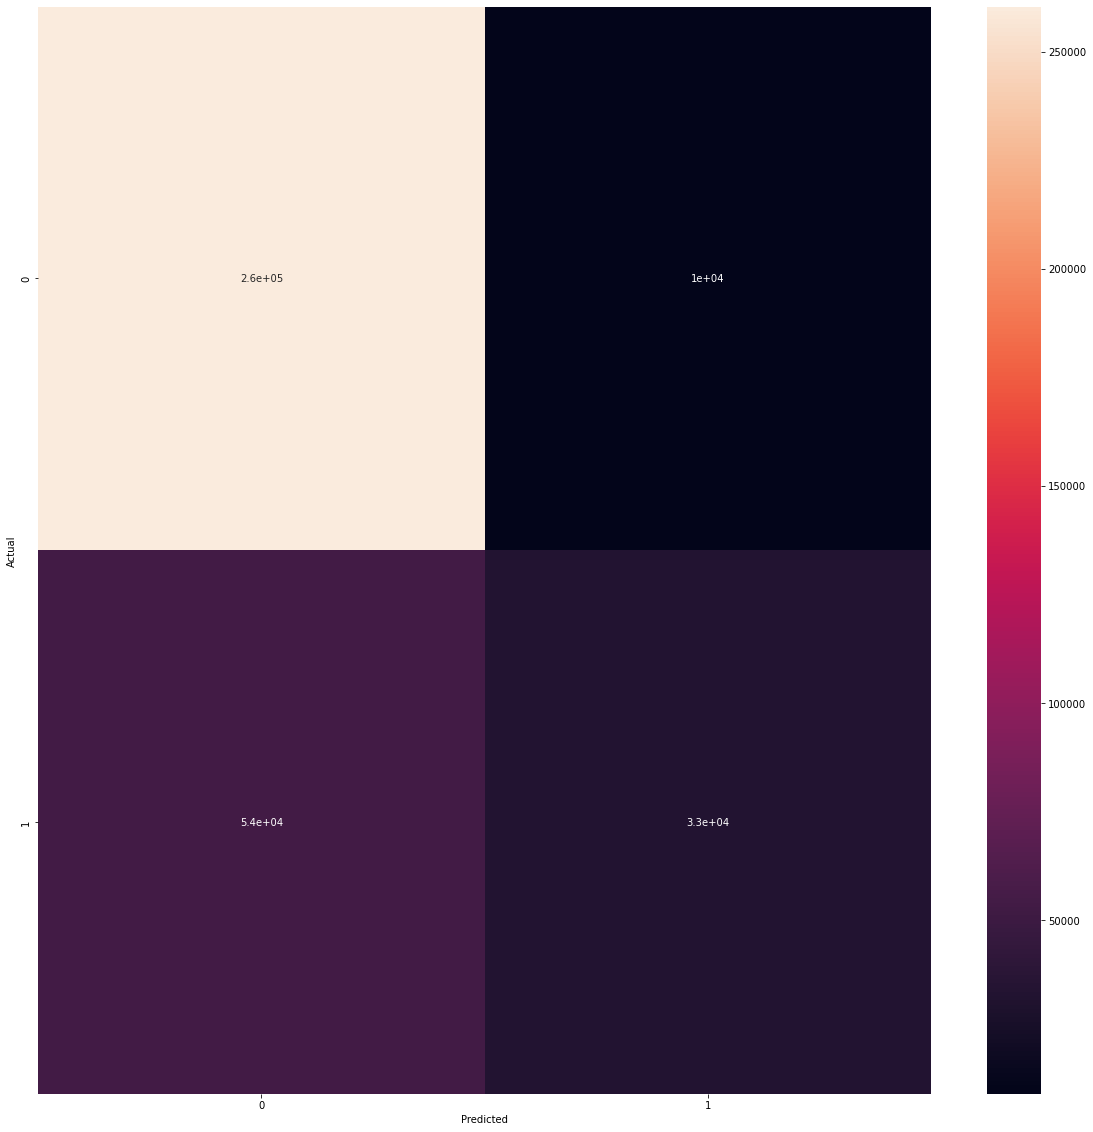

In [40]:
logdata = {'y_Predicted': predictions,
        'y_Actual':    y_test
        }

df_conf = pd.DataFrame(logdata, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

# Gaussian Naive Bayes

In [41]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

from sklearn.naive_bayes import GaussianNB

start = time.time()
Gaussianclf = GaussianNB()
Gaussianclf.fit(X_train,y_train)
predictions = Gaussianclf.predict(X_test)
times.append(time.time()-start)

In [42]:
NBscore = Gaussianclf.score(X_test,y_test)
print(NBscore)
accuracies.append(NBscore)

0.7570145479668929


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

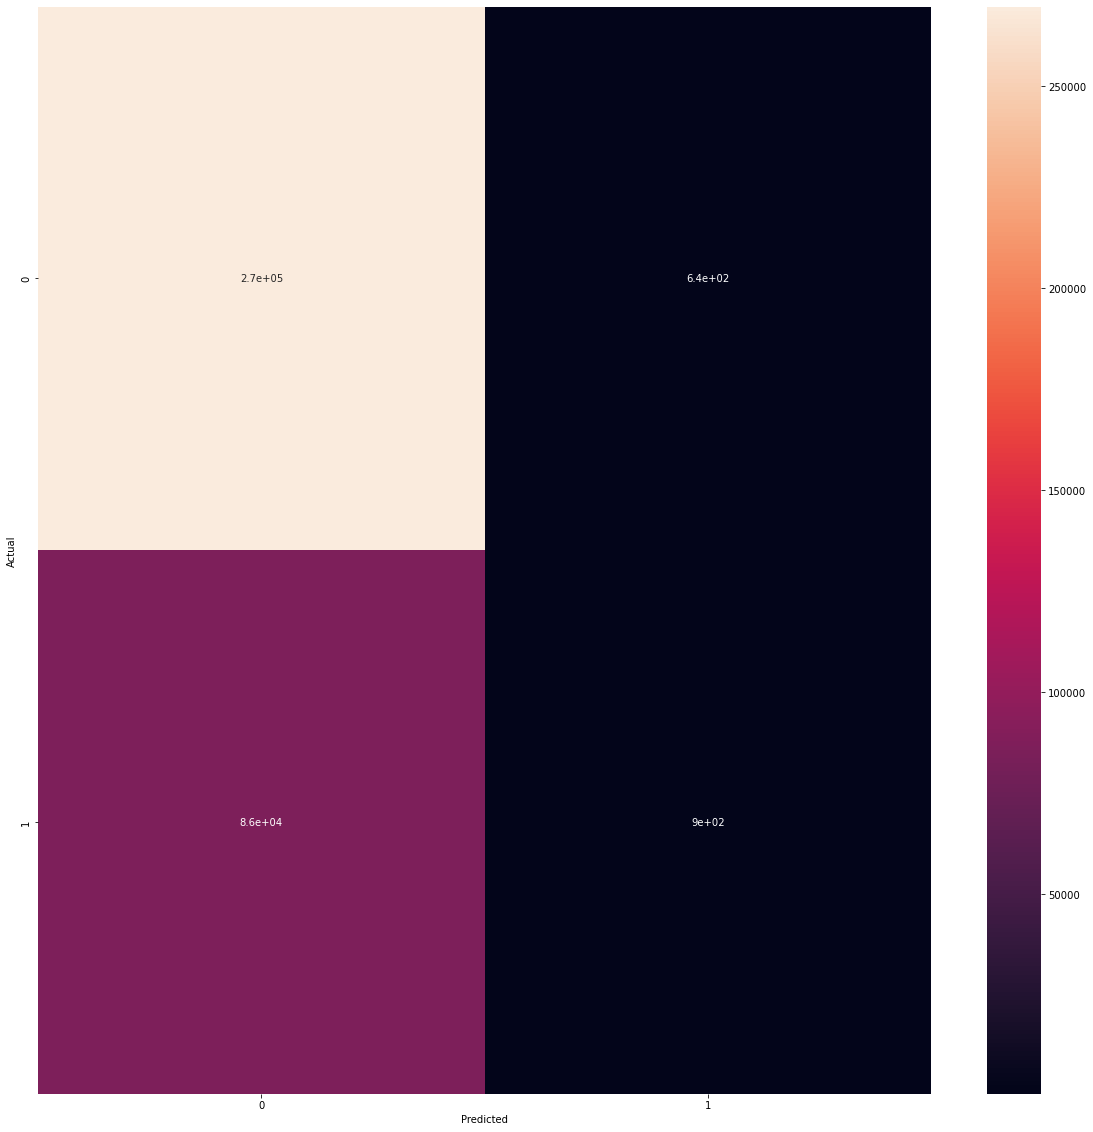

In [43]:
logdata = {'y_Predicted': predictions,
        'y_Actual':    y_test
        }

df_conf = pd.DataFrame(logdata, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier 

n_estimators_range = list(range(1,10))
acc_list = []

for i in n_estimators_range:
  random_forest = RandomForestClassifier(n_estimators = i)
  random_forest.fit(X_train, y_train)
  acc = random_forest.score(X_test,y_test)
  acc_list.append(acc)


best_n_estimators_index = np.argmax(acc_list)
best_n_estimators = n_estimators_range[best_n_estimators_index]
print(acc_list)


start_x = time.time()
final_rf = RandomForestClassifier(n_estimators =  best_n_estimators, max_depth=best_depth)
final_rf.fit(X_train, y_train)
pred = final_rf.predict(X_test)
accuracies.append(final_rf.score(X_test,y_test))
times.append(time.time()-start_x)

[0.8283390255295701, 0.8292984473031297, 0.829485856220997, 0.8299697628298187, 0.8304033207741387, 0.8302410861885222, 0.8303194063333026, 0.8302103175602156, 0.8304564665866683]


# Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
'''
# Okayyy...why did I wait 6 mins for this to run for it to be no help whatsover? 
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)'''
acc_list = []

depths = list(range(1,4))
for i in depths:    
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=i, random_state=42)
    gbc.fit(X_train,y_train)
    predictions = gbc.predict(X_test)
    cross_val_acc = np.mean(cross_val_score(gbc,X_train,y_train,cv=2))
    acc_list.append(cross_val_acc)

    #print(predictions==y_test)
    #print(acc)

best_depth_index = np.argmax(acc_list)
best_depth_boosting = depths[best_depth_index]
print(best_depth_boosting)

'''imp_features = gbc.feature_importances_
for i in imp_features:
    print(i.round(3))
df_imp_features = pd.DataFrame({"features":df_audio_features.columns}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False)'''

4


'imp_features = gbc.feature_importances_\nfor i in imp_features:\n    print(i.round(3))\ndf_imp_features = pd.DataFrame({"features":df_audio_features.columns}).join(pd.DataFrame({"weights":imp_features}))\ndf_imp_features.sort_values(by=[\'weights\'], ascending=False)'

In [46]:
start = time.time()
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=best_depth, random_state=42)
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
times.append(time.time()-start)

In [47]:
GBCscore = gbc.score(X_test,y_test)
print(GBCscore)
accuracies.append(GBCscore)

0.8293683760038265


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

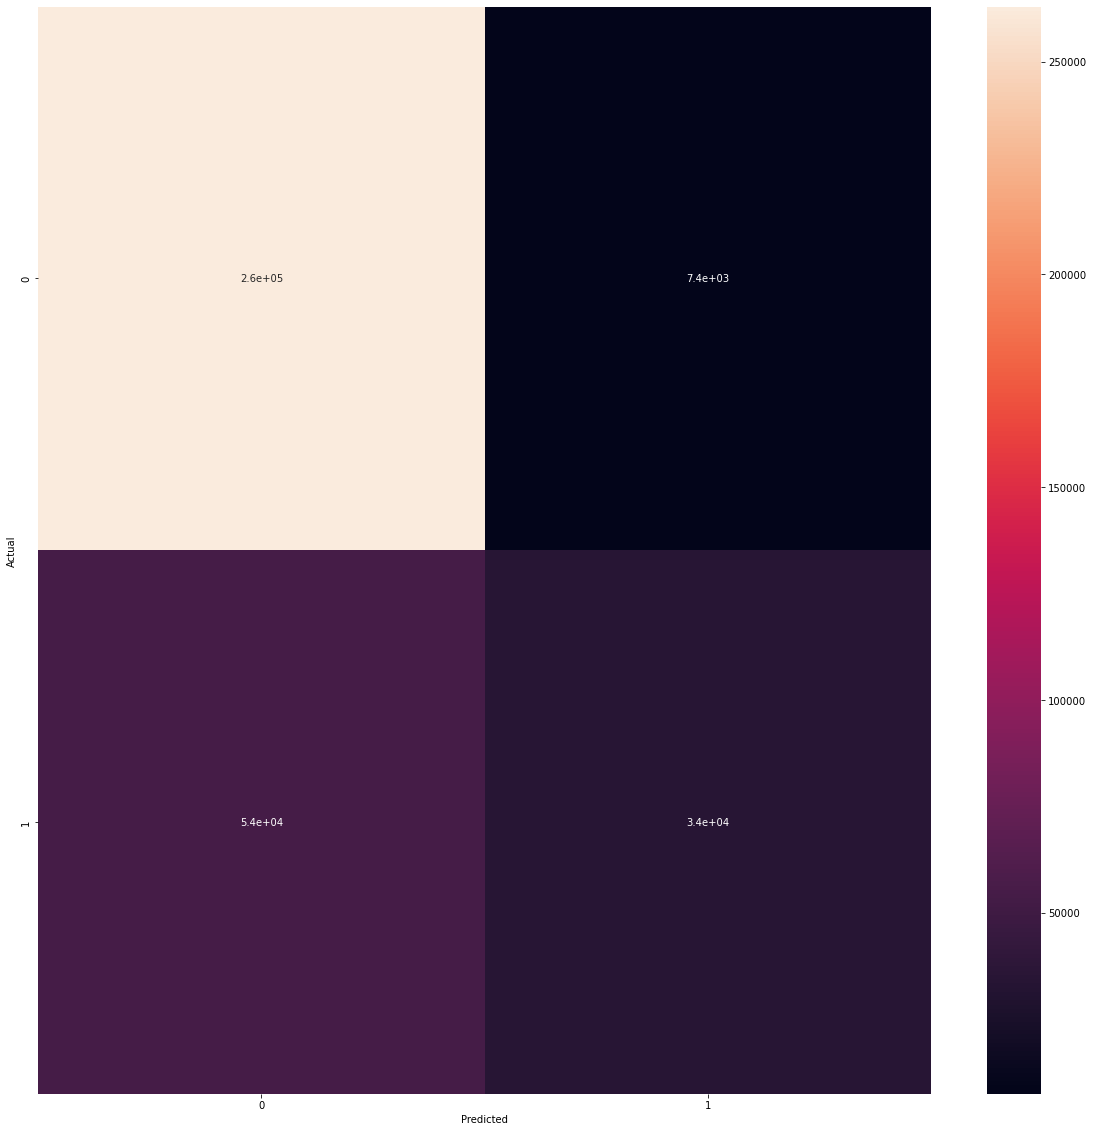

In [48]:
logdata = {'y_Predicted': predictions,
        'y_Actual':    y_test
        }

df_conf = pd.DataFrame(logdata, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

# Algorithm 6: KMeans

Text(0.5, 1.0, '# of Clusters vs Inertia')

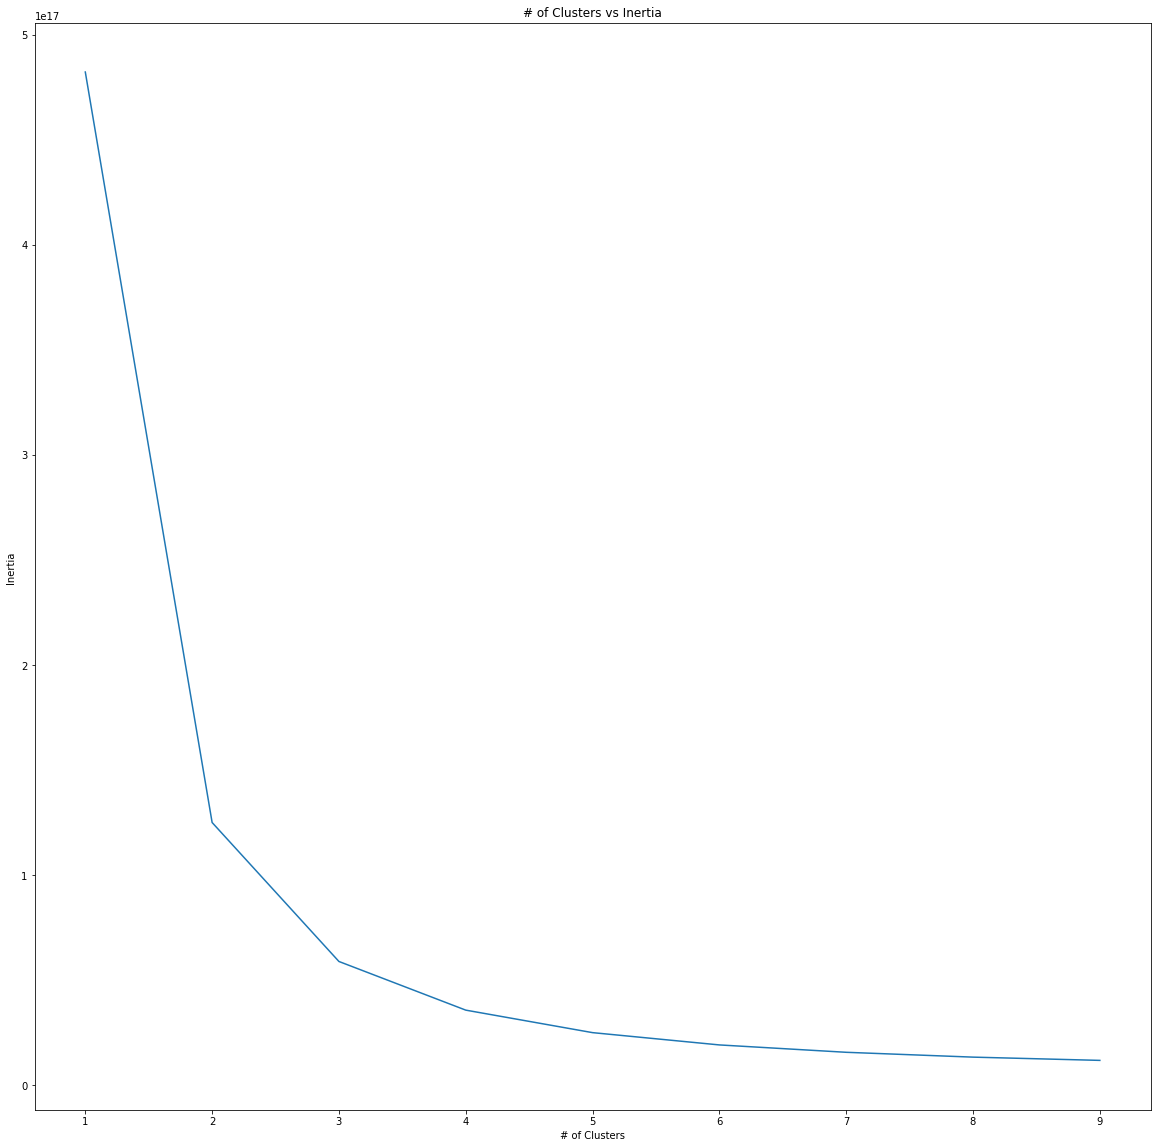

In [49]:
# source: https://medium.com/@vermapragya/spotify-music-data-analysis-part-4-4016e2954795

from sklearn.cluster import KMeans

variance = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_audio_features)
    variance.append(kmeans.inertia_)

plt.plot(list(range(1,10)),variance)  # In the cluster range from 1 to 10, the optimal clusters are 4
plt.xlabel("# of Clusters")
plt.ylabel("Inertia ")
plt.title("# of Clusters vs Inertia")

C:\Users\moson\AppData\Local\Temp\ipykernel_25680\503654566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_features['kmeans']=kmeans_model.fit_predict(df_audio_features)


<AxesSubplot:xlabel='streams', ylabel='kmeans'>

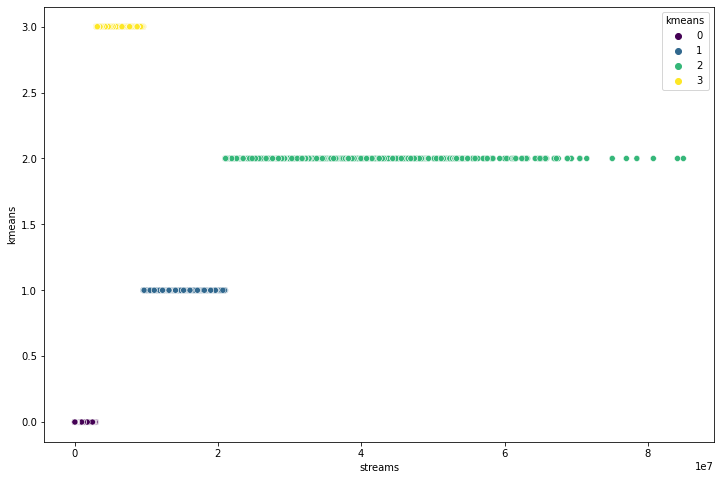

In [50]:
df_audio_features = df[['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration','streams']]
kmeans_model = KMeans(4)
kmeans_model.fit(df_audio_features)
df_audio_features['kmeans']=kmeans_model.fit_predict(df_audio_features)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_audio_features, x=df_audio_features['streams'], y=df_audio_features['kmeans'], hue='kmeans', palette='viridis')

In [51]:
df_audio_features["Clusters"]=kmeans.labels_

df_audio_features["Clusters"].value_counts(sort=True, ascending=False)

print("Cluster 0: ", sum(df_audio_features["Clusters"]==0))
print("Cluster 1: ", sum(df_audio_features["Clusters"]==1))
print("Cluster 2: ", sum(df_audio_features["Clusters"]==2))
print("Cluster 3: ", sum(df_audio_features["Clusters"]==3))

C:\Users\moson\AppData\Local\Temp\ipykernel_25680\3367488685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_features["Clusters"]=kmeans.labels_


Cluster 0:  206109
Cluster 1:  194191
Cluster 2:  197360
Cluster 3:  208478


# With PCA

In [52]:
from sklearn.decomposition import PCA

'''my_tree = DecisionTreeClassifier(criterion="entropy", max_depth = best_depth, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
Gaussianclf = GaussianNB()'''

classifiers = [my_tree,knn,Gaussianclf,final_rf,gbc] #add classifier to this list once you're done
PCAscores = []
PCAtimes = []

for clf in classifiers:
  start = time.time()
  pcaclf = PCA(n_components=2, random_state=42)
  pcaclf.fit(X_train) 
  pca_train = pcaclf.transform(X_train)
  pca_test = pcaclf.transform(X_test)

  clf.fit(pca_train, y_train)

  PCAscores.append(clf.score(pca_test,y_test))

  pred = clf.predict(pca_test)
  PCAtimes.append(time.time()-start)

In [53]:
print(PCAscores)

[0.7630284162268152, 0.8189713767842308, 0.7566481215752419, 0.764482933201308, 0.81851264450766]


# With PCA + MinMaxScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler

PCAMinMaxScores = []
PCAMinMaxTimes = []

for clf in classifiers:
  start = time.time()
  scaler = MinMaxScaler()
  scaler.fit(X_train)
  minmaxscaled_xtrain = scaler.transform(X_train)
  minmaxscaled_xtest = scaler.transform(X_test)

  minmax_pca = PCA(n_components=2, random_state=42)
  minmax_pca.fit(minmaxscaled_xtrain) 
  minmax_pca_train = minmax_pca.transform(minmaxscaled_xtrain)
  minmax_pca_test = minmax_pca.transform(minmaxscaled_xtest)

  clf.fit(minmax_pca_train, y_train)

  PCAMinMaxScores.append(clf.score(minmax_pca_test,y_test))

  pred = clf.predict(minmax_pca_test)
  PCAMinMaxTimes.append(time.time()-start)

In [55]:
print(PCAMinMaxScores)

[0.7610088753506924, 0.8183028584055697, 0.7562788980355629, 0.761171109936309, 0.8185685874682174]


In [56]:
print(times)

[15.477089881896973, 45.4664568901062, 2.2849960327148438, 44.5654182434082, 1293.3116555213928]


# Visualizations

[0.7669304377256949, 0.8218608306970213, 0.7570145479668929, 0.7658954929553827, 0.8293683760038265]


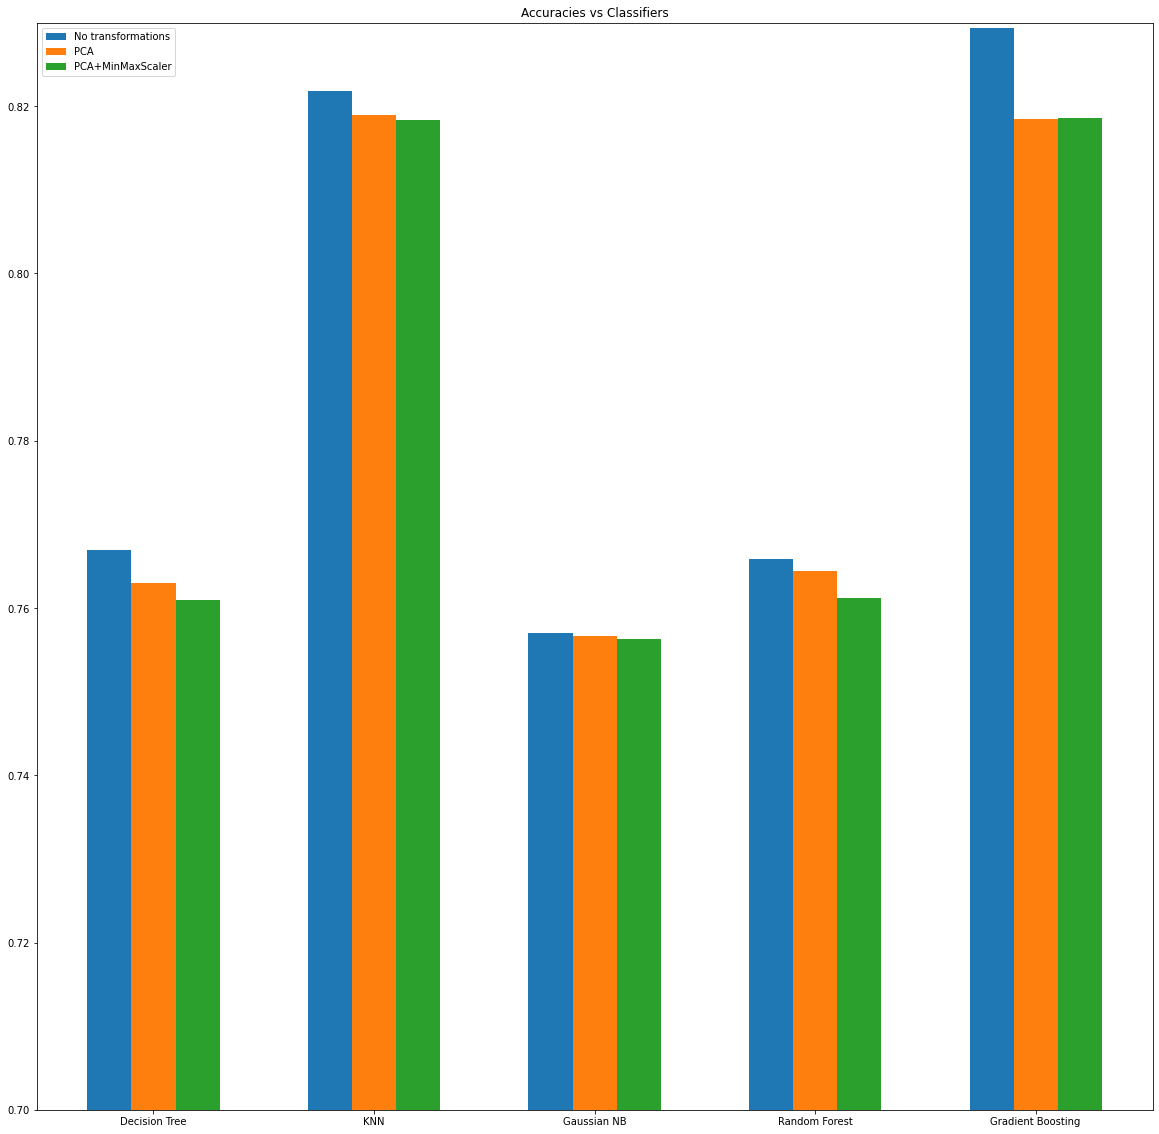

In [77]:
classifiers_list = ["Decision Tree","KNN","Gaussian NB","Random Forest","Gradient Boosting"]
legend = ["No transformations", "PCA", "PCA+MinMaxScaler"]
print(accuracies)
plt.title("Accuracies vs Classifiers")
plt.ylim(0.7, 0.83)
#x_axis = np.arange(classifiers_list)
width = 0.2
x=np.arange(5)
plt.bar(x-width, accuracies, width, label='No transformations')
plt.bar(x, PCAscores, width, label='PCA')
plt.bar(x+width, PCAMinMaxScores, width, label='PCA+MinMaxScaler')
plt.xticks(x, ["Decision Tree","KNN","Gaussian NB","Random Forest","Gradient Boosting"])
#plt.figure(figsize=(40,40))
plt.legend(legend,loc=2);
plt.savefig('bars.jpg', bbox_inches='tight', dpi=150)
plt.show()

[15.477089881896973, 45.4664568901062, 2.2849960327148438, 44.5654182434082, 1293.3116555213928]


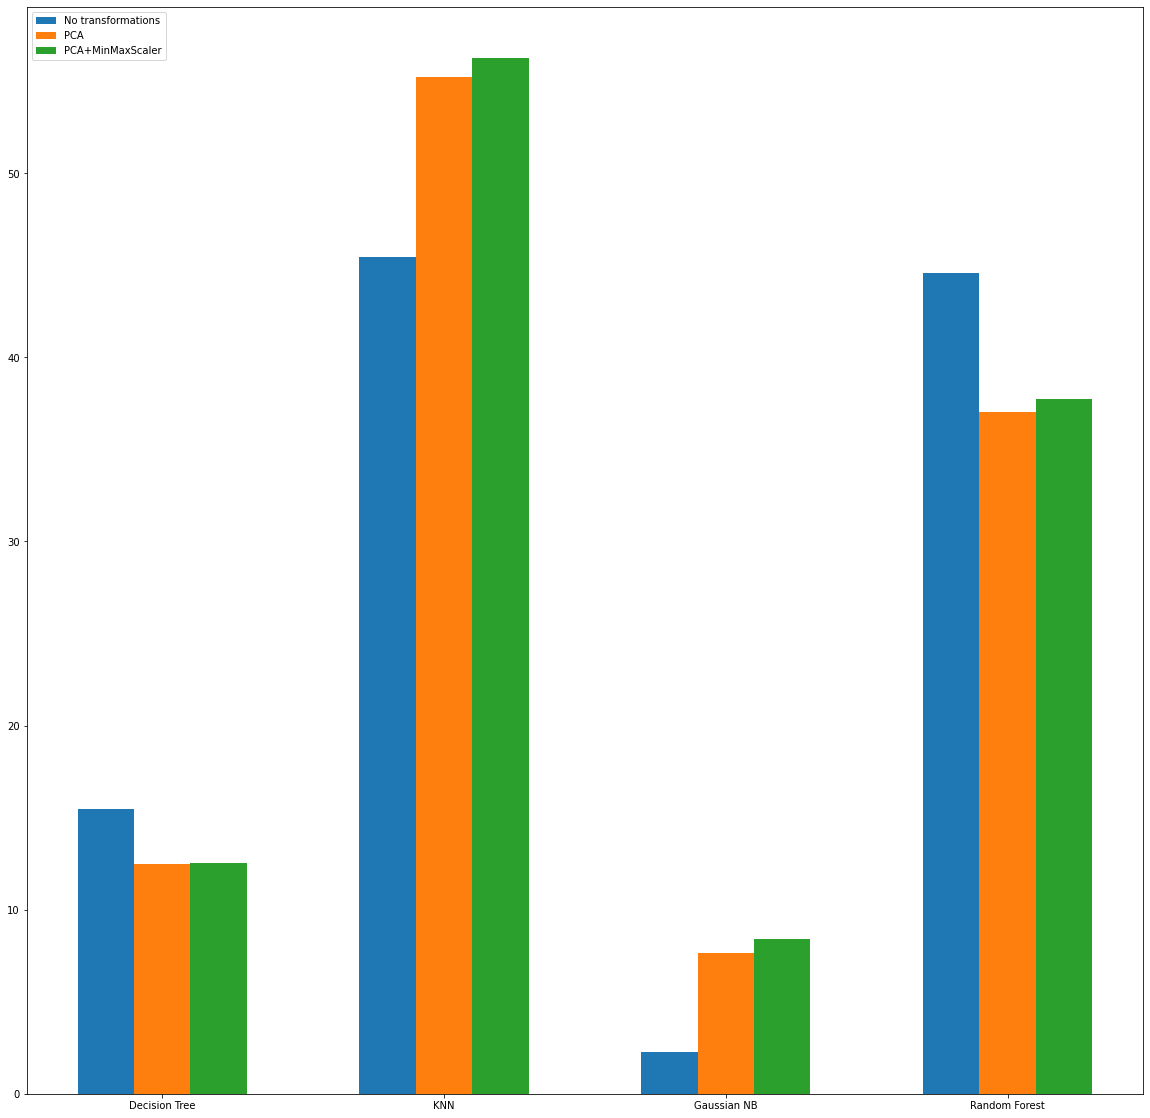

In [79]:
classifiers_list = ["Decision Tree","KNN","Gaussian NB","Random Forest"]
print(times)
#plt.ylim(0.7, 0.85)
#x_axis = np.arange(classifiers_list)
width = 0.2
x=np.arange(4)
plt.bar(x-width, times[:4], width)
plt.bar(x, PCAtimes[:4], width)
plt.bar(x+width, PCAMinMaxTimes[:4], width)
plt.xticks(x, ["Decision Tree","KNN","Gaussian NB", "Random Forest"])
#plt.figure(figsize=(20,40))
plt.legend(legend,loc=2);
plt.savefig('times.jpg', bbox_inches='tight', dpi=150)
plt.show()